In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) 

In [7]:
#感知机
from sklearn.linear_model import Perceptron

In [8]:
ppn = Perceptron(n_iter = 40,eta0 = 0.1,random_state = 0)

In [9]:
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [10]:
y_pred = ppn.predict(X_test_std)

In [11]:
print('Misclassified samples: %d' %(y_test != y_pred).sum())

Misclassified samples: 4


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx = None,resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #plot all samples
    X_test,y_test = X[test_idx,:],y[test_idx]
    for idx,c1 in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c1,0],y = X[y == c1,1],alpha = 0.8,c = cmap(idx),marker = markers[idx],label = c1)
        
    #highlight test samples
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c = '',alpha = 1.0,linewidth = 1,marker = 'o',s = 55,label = 'test set')

In [14]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

In [15]:
plot_decision_regions(X = X_combined_std,y = y_combined,classifier = ppn,test_idx = range(105,150))

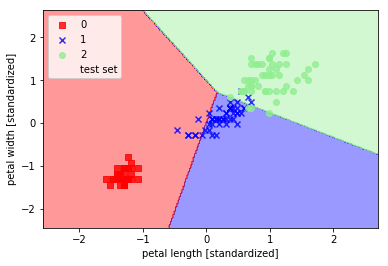

In [16]:
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
#逻辑回归
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(C = 1000.0,random_state = 0)

In [19]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [20]:
plot_decision_regions(X = X_combined_std,y = y_combined,classifier = lr,test_idx = range(105,150))

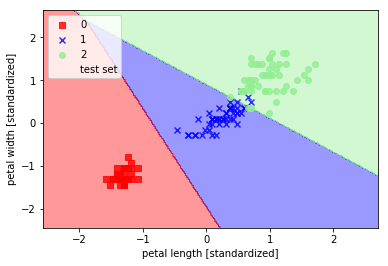

In [21]:
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [22]:
#正则化分析
weights,params = [],[]
for c in np.arange(-5,5):
    lr = LogisticRegression(C = 10**float(c),random_state = 0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**float(c))
weights = np.array(weights)

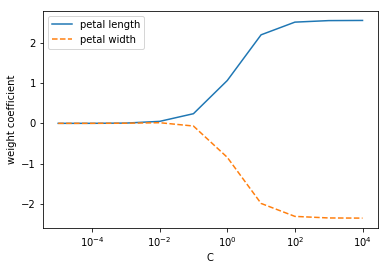

In [23]:
plt.plot(params,weights[:,0],label = 'petal length')
plt.plot(params,weights[:,1],linestyle = '--',label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

In [24]:
#支持向量机
from sklearn.svm import SVC

In [25]:
svm = SVC(kernel = 'linear',C = 1.0,random_state = 0)
svm.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
plot_decision_regions(X = X_combined_std,y = y_combined,classifier = svm,test_idx = range(105,150))

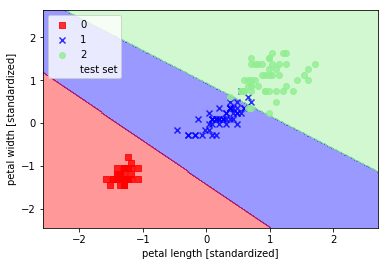

In [27]:
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

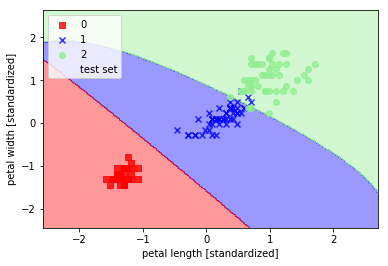

In [29]:
#高斯核支持向量机
svm = SVC(kernel = 'rbf',random_state = 0,gamma = 0.2,C = 1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X = X_combined_std,y = y_combined,classifier = svm,test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

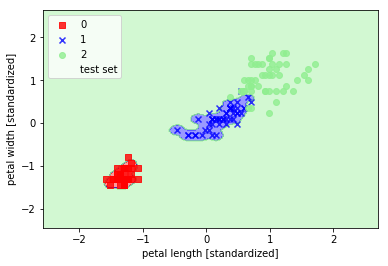

In [30]:
#增加gamma值
svm = SVC(kernel = 'rbf',random_state = 0,gamma = 100.0,C = 1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X = X_combined_std,y = y_combined,classifier = svm,test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [33]:
#决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,random_state = 0)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

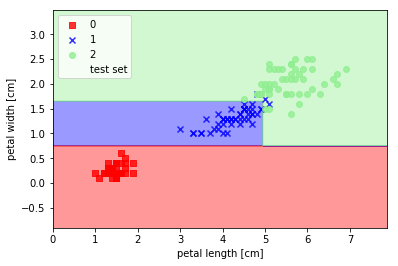

In [34]:
plot_decision_regions(X = X_combined,y = y_combined,classifier = tree,test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [35]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file = 'tree.dot',feature_names = ['petal length','petal width'])

In [37]:
#随机森林集成
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy',n_estimators = 10,random_state = 1,n_jobs = 2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

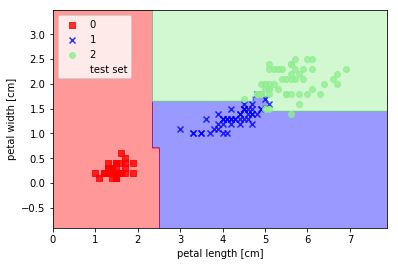

In [38]:
plot_decision_regions(X = X_combined,y = y_combined,classifier = forest,test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [41]:
#K近邻方法KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,p = 2,metric = 'minkowski')
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

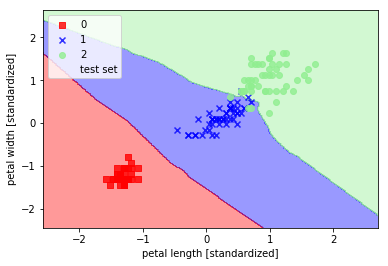

In [42]:
plot_decision_regions(X_combined_std,y_combined,classifier = knn,test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()